In [ ]:
import pandas as pd

try:
    df = pd.read_csv('grid_asset_data.csv')
    display(df)
except FileNotFoundError:
    print("Error: grid_asset_data.csv not found. Please make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,Timestamp,Substation_ID,Asset_ID,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event,Reconfig_Action,Asset_Type
0,2025-05-01 00:00:00,SS_001,TR_01,232.48,9.59,2.23,50.13,0.0372,Industrial,NaN,NaN,Transformer
1,2025-05-01 00:01:00,SS_001,SW_01,237.62,9.30,2.21,49.95,0.0368,Industrial,NaN,NaN,Switch
2,2025-05-01 00:02:00,SS_001,SM_01,237.90,12.30,2.93,49.91,0.0488,Residential,NaN,NaN,SmartMeter
3,2025-05-01 00:03:00,SS_001,SW_01,232.71,8.61,2.00,49.91,0.0333,Commercial,NaN,NaN,Switch
4,2025-05-01 00:04:00,SS_002,SM_01,231.21,4.26,0.98,49.66,0.0163,Commercial,NaN,NaN,SmartMeter
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2025-05-01 23:55:00,SS_001,TR_01,222.01,8.11,1.80,50.15,0.0300,Industrial,NaN,NaN,Transformer
1436,2025-05-01 23:56:00,SS_001,TR_01,229.02,8.61,1.97,50.01,0.0328,Commercial,NaN,NaN,Transformer
1437,2025-05-01 23:57:00,SS_001,TR_01,221.27,11.48,2.54,50.08,0.0423,Commercial,NaN,NaN,Transformer
1438,2025-05-01 23:58:00,SS_001,TR_01,227.95,13.02,2.97,49.77,0.0495,Commercial,NaN,NaN,Transformer


from matplotlib import pyplot as plt
df['Voltage_V'].plot(kind='hist', bins=20, title='Voltage_V')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Current_A'].plot(kind='hist', bins=20, title='Current_A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Power_kW'].plot(kind='hist', bins=20, title='Power_kW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Frequency_Hz'].plot(kind='hist', bins=20, title='Frequency_Hz')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Substation_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Asset_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Load_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fault_Event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Voltage_V', y='Current_A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Current_A', y='Power_kW', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Power_kW', y='Frequency_Hz', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Frequency_Hz', y='Energy_Consumed_kWh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Voltage_V']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Substation_ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Substation_ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Voltage_V')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Voltage_V']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Asset_ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Asset_ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Voltage_V')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Voltage_V']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Load_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Load_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Voltage_V')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Voltage_V']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fault_Event')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fault_Event', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Voltage_V')

from matplotlib import pyplot as plt
df['Voltage_V'].plot(kind='line', figsize=(8, 4), title='Voltage_V')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Current_A'].plot(kind='line', figsize=(8, 4), title='Current_A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Power_kW'].plot(kind='line', figsize=(8, 4), title='Power_kW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Frequency_Hz'].plot(kind='line', figsize=(8, 4), title='Frequency_Hz')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Asset_ID'].value_counts()
    for x_label, grp in df.groupby('Substation_ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Substation_ID')
_ = plt.ylabel('Asset_ID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Load_Type'].value_counts()
    for x_label, grp in df.groupby('Asset_ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Asset_ID')
_ = plt.ylabel('Load_Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fault_Event'].value_counts()
    for x_label, grp in df.groupby('Load_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Load_Type')
_ = plt.ylabel('Fault_Event')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Reconfig_Action'].value_counts()
    for x_label, grp in df.groupby('Fault_Event')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fault_Event')
_ = plt.ylabel('Reconfig_Action')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Substation_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Voltage_V', y='Substation_ID', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Asset_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Voltage_V', y='Asset_ID', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Load_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Voltage_V', y='Load_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fault_Event'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Voltage_V', y='Fault_Event', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


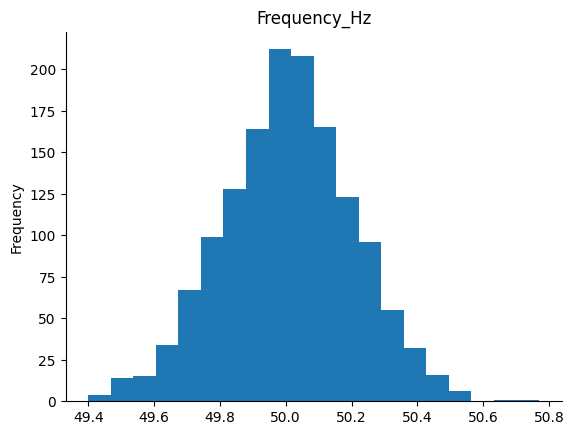

In [ ]:
# @title Frequency_Hz

from matplotlib import pyplot as plt
df['Frequency_Hz'].plot(kind='hist', bins=20, title='Frequency_Hz')
plt.gca().spines[['top', 'right',]].set_visible(False)

# New Section

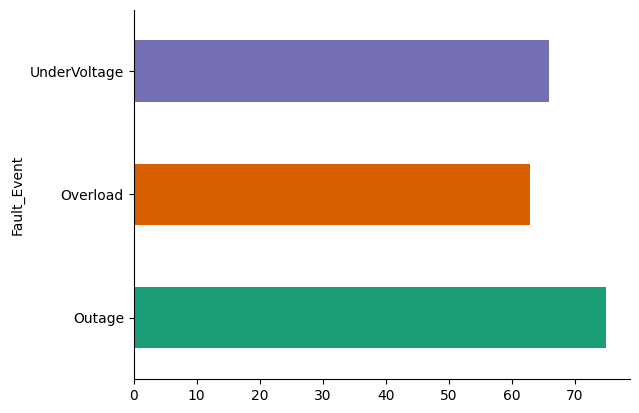

In [ ]:
# @title Fault_Event

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fault_Event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

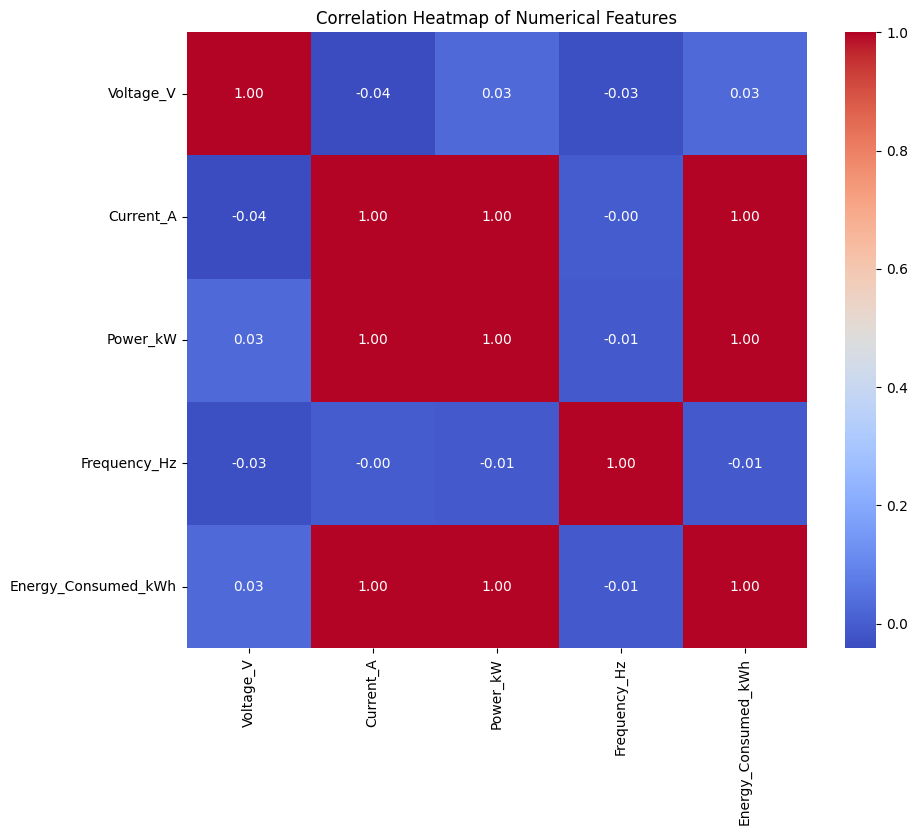

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the heatmap
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Timestamp                 0
Substation_ID             0
Asset_ID                  0
Voltage_V                 0
Current_A                 0
Power_kW                  0
Frequency_Hz              0
Energy_Consumed_kWh       0
Load_Type                 0
Fault_Event            1236
Reconfig_Action        1236
Asset_Type                0
dtype: int64


In [ ]:
# Get value counts for 'Fault_Event'
fault_event_counts = df['Fault_Event'].value_counts(dropna=False)
print("Value counts for 'Fault_Event':")
print(fault_event_counts)

# Get value counts for 'Reconfig_Action'
reconfig_action_counts = df['Reconfig_Action'].value_counts(dropna=False)
print("\nValue counts for 'Reconfig_Action':")
print(reconfig_action_counts)

Value counts for 'Fault_Event':
Fault_Event
NaN             1236
Outage            75
UnderVoltage      66
Overload          63
Name: count, dtype: int64

Value counts for 'Reconfig_Action':
Reconfig_Action
NaN             1236
Load_Balance     204
Name: count, dtype: int64


In [ ]:
# Replace missing values in 'Fault_Event' and 'Reconfig_Action' with 'Normal'
df['Fault_Event'] = df['Fault_Event'].fillna('Normal')
df['Reconfig_Action'] = df['Reconfig_Action'].fillna('Normal')

# Verify the replacement by checking for missing values again
print("Missing values after replacement:")
print(df.isnull().sum())

# Display the value counts for the modified columns to confirm the change
print("\nValue counts for 'Fault_Event' after replacement:")
print(df['Fault_Event'].value_counts(dropna=False))

print("\nValue counts for 'Reconfig_Action' after replacement:")
print(df['Reconfig_Action'].value_counts(dropna=False))

Missing values after replacement:
Timestamp              0
Substation_ID          0
Asset_ID               0
Voltage_V              0
Current_A              0
Power_kW               0
Frequency_Hz           0
Energy_Consumed_kWh    0
Load_Type              0
Fault_Event            0
Reconfig_Action        0
Asset_Type             0
dtype: int64

Value counts for 'Fault_Event' after replacement:
Fault_Event
Normal          1236
Outage            75
UnderVoltage      66
Overload          63
Name: count, dtype: int64

Value counts for 'Reconfig_Action' after replacement:
Reconfig_Action
Normal          1236
Load_Balance     204
Name: count, dtype: int64


/tmp/ipython-input-22-1594430779.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fault_event_counts.index, y=fault_event_counts.values, palette='viridis')


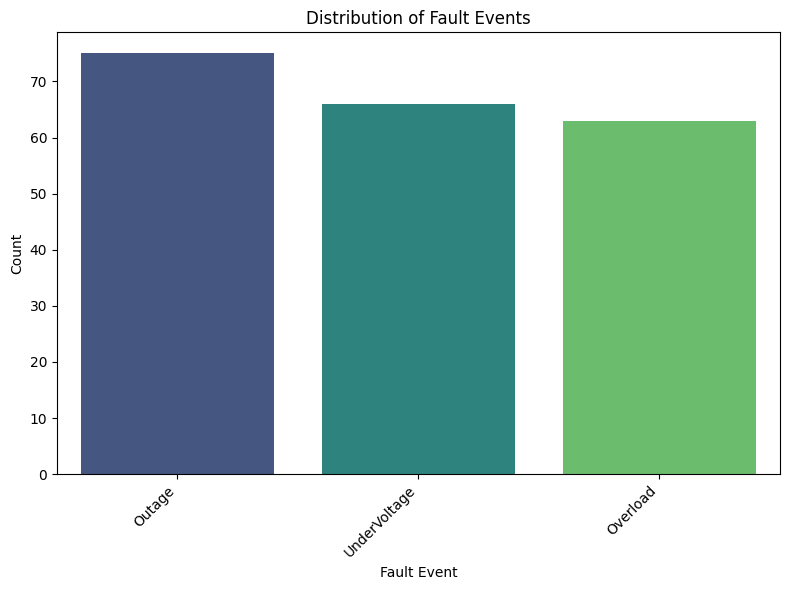

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the previously calculated fault_event_counts
# fault_event_counts = df['Fault_Event'].value_counts() # This line is commented out as 'Fault_Event' column no longer exists

# Ensure 'Normal' is included in the counts if it was added as a fillna value
# The fault_event_counts variable already includes 'Normal' from a previous step

plt.figure(figsize=(8, 6))
sns.barplot(x=fault_event_counts.index, y=fault_event_counts.values, palette='viridis')
plt.title('Distribution of Fault Events')
plt.xlabel('Fault Event')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
display(df)

,Timestamp,Substation_ID,Asset_ID,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Fault_Event,Reconfig_Action,Asset_Type
0,2025-05-01 00:00:00,SS_001,TR_01,232.48,9.59,2.23,50.13,0.0372,Industrial,Normal,Normal,Transformer
1,2025-05-01 00:01:00,SS_001,SW_01,237.62,9.30,2.21,49.95,0.0368,Industrial,Normal,Normal,Switch
2,2025-05-01 00:02:00,SS_001,SM_01,237.90,12.30,2.93,49.91,0.0488,Residential,Normal,Normal,SmartMeter
3,2025-05-01 00:03:00,SS_001,SW_01,232.71,8.61,2.00,49.91,0.0333,Commercial,Normal,Normal,Switch
4,2025-05-01 00:04:00,SS_002,SM_01,231.21,4.26,0.98,49.66,0.0163,Commercial,Normal,Normal,SmartMeter
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2025-05-01 23:55:00,SS_001,TR_01,222.01,8.11,1.80,50.15,0.0300,Industrial,Normal,Normal,Transformer
1436,2025-05-01 23:56:00,SS_001,TR_01,229.02,8.61,1.97,50.01,0.0328,Commercial,Normal,Normal,Transformer
1437,2025-05-01 23:57:00,SS_001,TR_01,221.27,11.48,2.54,50.08,0.0423,Commercial,Normal,Normal,Transformer
1438,2025-05-01 23:58:00,SS_001,TR_01,227.95,13.02,2.97,49.77,0.0495,Commercial,Normal,Normal,Transformer


In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_grid_asset_data.csv', index=False)

print("Cleaned data saved to 'cleaned_grid_asset_data.csv'")

Cleaned data saved to 'cleaned_grid_asset_data.csv'


In [ ]:
import pandas as pd

# Apply one-hot encoding to 'Fault_Event' and 'Reconfig_Action' columns
df = pd.get_dummies(df, columns=['Fault_Event', 'Reconfig_Action'], dtype=int)

# Display the first few rows to show the changes
display(df.head())

,Timestamp,Substation_ID,Asset_ID,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Asset_Type,Fault_Event_Normal,Fault_Event_Outage,Fault_Event_Overload,Fault_Event_UnderVoltage,Reconfig_Action_Load_Balance,Reconfig_Action_Normal
0,2025-05-01 00:00:00,SS_001,TR_01,232.48,9.59,2.23,50.13,0.0372,Industrial,Transformer,1,0,0,0,0,1
1,2025-05-01 00:01:00,SS_001,SW_01,237.62,9.30,2.21,49.95,0.0368,Industrial,Switch,1,0,0,0,0,1
2,2025-05-01 00:02:00,SS_001,SM_01,237.90,12.30,2.93,49.91,0.0488,Residential,SmartMeter,1,0,0,0,0,1
3,2025-05-01 00:03:00,SS_001,SW_01,232.71,8.61,2.00,49.91,0.0333,Commercial,Switch,1,0,0,0,0,1
4,2025-05-01 00:04:00,SS_002,SM_01,231.21,4.26,0.98,49.66,0.0163,Commercial,SmartMeter,1,0,0,0,0,1


In [ ]:
display(df.head())

,Timestamp,Substation_ID,Asset_ID,Voltage_V,Current_A,Power_kW,Frequency_Hz,Energy_Consumed_kWh,Load_Type,Asset_Type,Fault_Event_Normal,Fault_Event_Outage,Fault_Event_Overload,Fault_Event_UnderVoltage,Reconfig_Action_Load_Balance,Reconfig_Action_Normal
0,2025-05-01 00:00:00,SS_001,TR_01,232.48,9.59,2.23,50.13,0.0372,Industrial,Transformer,1,0,0,0,0,1
1,2025-05-01 00:01:00,SS_001,SW_01,237.62,9.30,2.21,49.95,0.0368,Industrial,Switch,1,0,0,0,0,1
2,2025-05-01 00:02:00,SS_001,SM_01,237.90,12.30,2.93,49.91,0.0488,Residential,SmartMeter,1,0,0,0,0,1
3,2025-05-01 00:03:00,SS_001,SW_01,232.71,8.61,2.00,49.91,0.0333,Commercial,Switch,1,0,0,0,0,1
4,2025-05-01 00:04:00,SS_002,SM_01,231.21,4.26,0.98,49.66,0.0163,Commercial,SmartMeter,1,0,0,0,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for the 'Fault_Event' column
fault_event_counts = df['Fault_Event'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=fault_event_counts.index, y=fault_event_counts.values, palette='viridis')
plt.title('Distribution of Fault Events')
plt.xlabel('Fault Event')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Fault_Event'